Data de entrega: 17/04

Pacotes utilizados

In [56]:
#Basic:
import pandas as pd
import numpy as np
from datetime import date

#Plots:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
#import cufflinks as cf

#Models:
from sklearn.preprocessing import MinMaxScaler #if used without index well set, makes null values
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import kmodes.kmodes as km
from scipy import stats


### Importação, 1ª exploração e pré-tratamento
Objetivo: buscar problemas no dataset survey da empresa BookMe para pré tratá-lo

| Attribute | Description |
| ---------- | --------- |
|Name | Customer’s name |
|Year Birth | Customer’s birth year |
|Longevity | Whether the customer registered more than 1 year ago or not (yes or no)|
|Churn| Whether the customer churned or not (churn or nochurn) - stopped using|
|TypeTravel| Customer’s reason for travelling (business or leisure)
|RoomType |Type of room reserved
|RewardPoints| Customer’s rewarding point for loyalty
|Comfort| Satisfaction level of customer regarding comfort of the room (0 to 5)
|ReceptionSchedule| Satisfaction level of customer regarding reception schedule (0 to 5)
|FoodDrink |Satisfaction level of customer regarding food and drink available (0 to 5)
|Location| Satisfaction level of customer regarding accommodation location (0 to 5)
|Wifi |Satisfaction level of customer regarding wi-fi service (0 to 5)
|Amenities| Satisfaction level of customer regarding accommodation amenities (0 to 5)
|Staff| Satisfaction level of customer regarding staff (0 to 5)
|OnlineBooking |Satisfaction level of customer regarding online booking ease (0 to 5)
|PriceQuality| Satisfaction level of customer regarding price quality relationship (0 to 5)
|RoomSpace| Satisfaction level of customer regarding room space (0 to 5)
|CheckOut| Satisfaction level of customer regarding check-out (0 to 5)
|CheckIn| Satisfaction level of customer regarding check-in (0 to 5)
|Cleanliness| Satisfaction level of customer regarding cleanliness (0 to 5)
|BarService| Satisfaction level of customer regarding bar service (0 to 5

In [57]:
df = pd.read_csv("cluster.csv")
df.head()

Churn                    Name Longevity  Year_Birth TypeTravel RoomType  \
0    churn       Ms. Nicole Clarke       yes      1974.0   business   single   
1  nochurn         Mr. Jesse Scott       yes      1965.0   business   single   
2    churn  Mr. Christopher Carter       yes      1973.0   business   single   
3  nochurn     Ms. Jennifer Morgan       yes      1993.0    leisure   double   
4  nochurn       Mr. Michael White       yes      1989.0   business   single   

   RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  Wifi  Amenities  \
0          4907        3                  4          1  ...     4          3   
1          6724        1                  1          1  ...     5          3   
2          4365        3                  3          3  ...     1          4   
3          3849        1                  1          1  ...     4          4   
4          5376        2                  2          3  ...     5          5   

   Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
0      4              3             3          3         3        4   
1      4              5             5          5         5        1   
2      4              3             3          2         3        2   
3      5              4             4          4         4        4   
4      5              5             5          3         4        1   

   Cleanliness  BarService  
0            3           4  
1            5           2  
2            3           1  
3            4           3  
4            3           5  

[5 rows x 21 columns]

In [58]:
# BT
df.head().T

0                1                       2  \
Churn                          churn          nochurn                   churn   
Name               Ms. Nicole Clarke  Mr. Jesse Scott  Mr. Christopher Carter   
Longevity                        yes              yes                     yes   
Year_Birth                    1974.0           1965.0                  1973.0   
TypeTravel                  business         business                business   
RoomType                      single           single                  single   
RewardPoints                    4907             6724                    4365   
Comfort                            3                1                       3   
ReceptionSchedule                  4                1                       3   
FoodDrink                          1                1                       3   
Location                           4                1                       3   
Wifi                               4                5                       1   
Amenities                          3                3                       4   
Staff                              4                4                       4   
OnlineBooking                      3                5                       3   
PriceQuality                       3                5                       3   
RoomSpace                          3                5                       2   
CheckOut                           3                5                       3   
Checkin                            4                1                       2   
Cleanliness                        3                5                       3   
BarService                         4                2                       1   

                                     3                  4  
Churn                          nochurn            nochurn  
Name               Ms. Jennifer Morgan  Mr. Michael White  
Longevity                          yes                yes  
Year_Birth                      1993.0             1989.0  
TypeTravel                     leisure           business  
RoomType                        double             single  
RewardPoints                      3849               5376  
Comfort                              1                  2  
ReceptionSchedule                    1                  2  
FoodDrink                            1                  3  
Location                             1                  2  
Wifi                                 4                  5  
Amenities                            4                  5  
Staff                                5                  5  
OnlineBooking                        4                  5  
PriceQuality                         4                  5  
RoomSpace                            4                  3  
CheckOut                             4                  4  
Checkin                              4                  1  
Cleanliness                          4                  3  
BarService                           3                  5

Observa-se a seguir que:
1. Ano de nascimento como float64 invés de int64.
2. Ano de nascimento possui NULL's.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [60]:
# BT
df.nunique()

Churn                    2
Name                 14227
Longevity                3
Year_Birth              75
TypeTravel               2
RoomType                 3
RewardPoints          4061
Comfort                  6
ReceptionSchedule        6
FoodDrink                6
Location                 5
Wifi                     7
Amenities                6
Staff                    5
OnlineBooking            6
PriceQuality             5
RoomSpace                6
CheckOut                 5
Checkin                  5
Cleanliness              5
BarService               6
dtype: int64

In [61]:

df.Longevity.unique()

array(['yes', 'no', 'y'], dtype=object)


Temos de transformar o "y" em "yes"

In [62]:

df.Wifi.unique()

array([4, 5, 1, 3, 2, 0, 6], dtype=int64)


Wifi com avaliação de "6"

Podemos tratar os dados faltantes de algumas formas:
1. Remover as linhas ".drop()".
2. Preencher com a média, por exemplo, de todos os anos.
3. Buscar o ano preenchido com o mesmo nome. 
4. Ou, o mais interessante, realizar o impute com base em outras features.

Optou-se inicialmente pelo drop pois são apenas 1% dos valores e é industrialmente mais rápido.

Verifica-se também que no Wifi há um preenchimento com 6.

In [64]:
df.describe().T

count         mean          std     min     25%     50%  \
Year_Birth         15394.0  1981.706444    15.179042  1936.0  1970.0  1981.0   
RewardPoints       15589.0  5022.593816  1027.962379   409.0  4445.0  5088.0   
Comfort            15589.0     2.841619     1.388624     0.0     2.0     3.0   
ReceptionSchedule  15589.0     2.997242     1.518994     0.0     2.0     3.0   
FoodDrink          15589.0     2.844570     1.436948     0.0     2.0     3.0   
Location           15589.0     2.986016     1.299438     1.0     2.0     3.0   
Wifi               15589.0     3.245109     1.327026     0.0     2.0     3.0   
Amenities          15589.0     3.374816     1.352417     0.0     2.0     4.0   
Staff              15589.0     3.506383     1.319565     1.0     3.0     4.0   
OnlineBooking      15589.0     3.454231     1.310343     0.0     2.0     4.0   
PriceQuality       15589.0     3.459683     1.268130     1.0     3.0     4.0   
RoomSpace          15589.0     3.470845     1.293873     0.0     2.0     4.0   
CheckOut           15589.0     3.700558     1.158644     1.0     3.0     4.0   
Checkin            15589.0     3.327282     1.266872     1.0     3.0     3.0   
Cleanliness        15589.0     3.692347     1.154437     1.0     3.0     4.0   
BarService         15589.0     3.347360     1.300452     0.0     2.0     3.0   

                      75%     max  
Year_Birth         1994.0  2014.0  
RewardPoints       5649.0  6950.0  
Comfort               4.0     5.0  
ReceptionSchedule     4.0     5.0  
FoodDrink             4.0     5.0  
Location              4.0     5.0  
Wifi                  4.0     6.0  
Amenities             4.0     5.0  
Staff                 5.0     5.0  
OnlineBooking         5.0     5.0  
PriceQuality          4.0     5.0  
RoomSpace             5.0     5.0  
CheckOut              5.0     5.0  
Checkin               4.0     5.0  
Cleanliness           5.0     5.0  
BarService            4.0     5.0

Não há um padrão claro que levou as pessoas a preencherem 6 no wifi, deve ser um erro da interface na plataforma do utilizador que precisa ser avisado ao desenvolvedor da solução contratado pela BookMe.

Portanto, optaremos apenas pelo drop pois são apenas 36 valores no universo de 15 mil.

In [65]:
df.query("Wifi==6").head()

Churn               Name Longevity  Year_Birth TypeTravel RoomType  \
321   nochurn    Mr. Ivan Brooks       yes      1982.0   business   double   
597   nochurn  Mr. Jackson Davis       yes      1994.0   business   single   
841   nochurn   Ms. Holly Taylor       yes      2012.0    leisure   double   
1298    churn    Mr. Jaime Jones        no      1993.0   business   double   
1455  nochurn   Mr. Hunter Frank       yes      1961.0   business    suite   

      RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  Wifi  \
321           4830        5                  3          3  ...     6   
597           4112        1                  1          4  ...     6   
841           4718        0                  4          0  ...     6   
1298          4968        4                  4          4  ...     6   
1455          5356        5                  3          3  ...     6   

      Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  \
321           5      5              5             1          3         1   
597           5      5              5             5          4         4   
841           4      4              2             2          0         2   
1298          4      5              5             1          1         3   
1455          5      5              5             5          3         4   

      Checkin  Cleanliness  BarService  
321         4            3           5  
597         4            5           5  
841         3            2           1  
1298        1            3           5  
1455        1            3           5  

[5 rows x 21 columns]

In [66]:
len(df.query("Wifi==6"))

36

In [67]:
df=df.drop(df[df.Wifi==6].index)

Verifica-se que há 3 linhas duplicadas que portanto serão removidas.

In [68]:
df[df.duplicated()]

Churn                  Name Longevity  Year_Birth TypeTravel RoomType  \
8195  nochurn      Ms. Abigail York       yes      1995.0    leisure   double   
9176    churn   Ms. Abigail Kennedy       yes      1991.0   business    suite   
9417  nochurn  Ms. Abigail Buchanan       yes      1972.0   business   double   

      RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  Wifi  \
8195          5098        5                  5          5  ...     4   
9176          5932        3                  3          2  ...     3   
9417          6769        5                  4          4  ...     5   

      Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  \
8195          5      5              3             3          4         3   
9176          3      3              3             4          1         4   
9417          5      4              5             5          5         5   

      Checkin  Cleanliness  BarService  
8195        3            3           5  
9176        3            4           3  
9417        2            5           1  

[3 rows x 21 columns]

In [69]:
df.drop_duplicates(inplace = True)
df= df.reset_index(drop=True)


Verifica-se que na longevidade há 3 categorias "yes", "y", "no" invés de 2 e portanto é necessário corrigir.

In [70]:
df.describe(include = ['O'])

Churn               Name Longevity TypeTravel RoomType
count     15550              15550     15550      15550    15550
unique        2              14193         3          2        3
top     nochurn  Mr. Michael Smith       yes   business   single
freq       8455                  9     12515      10730     7429

In [71]:
df.groupby("Longevity").size()

Longevity
no      2868
y        167
yes    12515
dtype: int64

In [72]:
df.loc[df["Longevity"]=="y","Longevity"] = "yes"

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

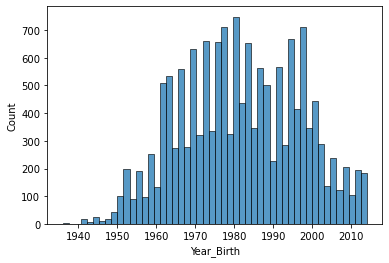

In [73]:
sns.histplot(data = df, x = "Year_Birth", bins = 50) #check outliers in order to apply KNN Imputer 

In [74]:
df= df.drop(df[df["Year_Birth"] < 1940].index) #duas observações
df= df.reset_index(drop=True)
df.describe()

Year_Birth  RewardPoints       Comfort  ReceptionSchedule  \
count  15353.000000  15548.000000  15548.000000       15548.000000   
mean    1981.708070   5022.403139      2.840944           2.997685   
std       15.175741   1028.077664      1.388131           1.518944   
min     1941.000000    409.000000      0.000000           0.000000   
25%     1970.000000   4444.750000      2.000000           2.000000   
50%     1981.000000   5088.000000      3.000000           3.000000   
75%     1994.000000   5649.000000      4.000000           4.000000   
max     2014.000000   6950.000000      5.000000           5.000000   

          FoodDrink      Location          Wifi     Amenities         Staff  \
count  15548.000000  15548.000000  15548.000000  15548.000000  15548.000000   
mean       2.845189      2.986043      3.238616      3.373360      3.504438   
std        1.436872      1.299296      1.322036      1.352742      1.319649   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      3.000000   
50%        3.000000      3.000000      3.000000      4.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

       OnlineBooking  PriceQuality     RoomSpace      CheckOut       Checkin  \
count   15548.000000  15548.000000  15548.000000  15548.000000  15548.000000   
mean        3.452084      3.459866      3.472344      3.701119      3.328274   
std         1.310272      1.268383      1.293469      1.158781      1.266722   
min         0.000000      1.000000      0.000000      1.000000      1.000000   
25%         2.000000      3.000000      2.000000      3.000000      3.000000   
50%         4.000000      4.000000      4.000000      4.000000      3.000000   
75%         5.000000      4.000000      5.000000      5.000000      4.000000   
max         5.000000      5.000000      5.000000      5.000000      5.000000   

        Cleanliness    BarService  
count  15548.000000  15548.000000  
mean       3.693015      3.345382  
std        1.154267      1.299626  
min        1.000000      0.000000  
25%        3.000000      2.000000  
50%        4.000000      3.000000  
75%        5.000000      4.000000  
max        5.000000      5.000000

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

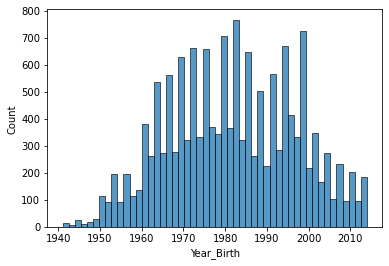

In [75]:
sns.histplot(data = df, x = "Year_Birth", bins = 50)

In [76]:
df[df.columns[1:]].corr()["Year_Birth"][:] #check correlation to see if same feature can explain Year_Birth

Year_Birth           1.000000
RewardPoints        -0.239501
Comfort             -0.018686
ReceptionSchedule   -0.049467
FoodDrink           -0.020524
Location            -0.008428
Wifi                -0.021823
Amenities           -0.130589
Staff               -0.118385
OnlineBooking       -0.082258
PriceQuality        -0.062730
RoomSpace           -0.091772
CheckOut             0.023592
Checkin             -0.025312
Cleanliness          0.016966
BarService          -0.045371
Name: Year_Birth, dtype: float64

In [77]:
df_bin=df.copy() #create a new dataset binning categorical, scalling continuous variable and drop Name, to apply Knn imputer concerning all variables
from sklearn.preprocessing import MinMaxScaler#if used without index well set, makes null values
#scalling
scaler = MinMaxScaler(feature_range=(0,1))
df_bin["Year_Birth"] = pd.DataFrame(scaler.fit_transform(df[["Year_Birth"]]))
df_bin["RewardPoints"] =pd.DataFrame(scaler.fit_transform(df[["RewardPoints"]]))# should be done before KNN in order to have more accuracy
df_bin.iloc[:,7:21] = pd.DataFrame(scaler.fit_transform(df.iloc[:,7:21]))


#binnig
df_bin["Longevity"] =df["Longevity"].astype("category").cat.codes
df_bin['Churn'] =df['Churn'].astype('category').cat.codes
df_bin['TypeTravel'] =df['TypeTravel'].astype('category').cat.codes
df_bin['RoomType'] =df['RoomType'].astype('category').cat.codes
df_bin=df_bin.drop("Name", axis=1)


In [78]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_bin = pd.DataFrame(imputer.fit_transform(df_bin))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15548 entries, 0 to 15547
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15548 non-null  object 
 1   Name               15548 non-null  object 
 2   Longevity          15548 non-null  object 
 3   Year_Birth         15353 non-null  float64
 4   TypeTravel         15548 non-null  object 
 5   RoomType           15548 non-null  object 
 6   RewardPoints       15548 non-null  int64  
 7   Comfort            15548 non-null  int64  
 8   ReceptionSchedule  15548 non-null  int64  
 9   FoodDrink          15548 non-null  int64  
 10  Location           15548 non-null  int64  
 11  Wifi               15548 non-null  int64  
 12  Amenities          15548 non-null  int64  
 13  Staff              15548 non-null  int64  
 14  OnlineBooking      15548 non-null  int64  
 15  PriceQuality       15548 non-null  int64  
 16  RoomSpace          155

In [79]:
df["Year_Birth_bin"]=df_bin[2] #assign column filled in KNN to initial data set
scaler = MinMaxScaler(feature_range=(1941,2014))
df["Year_Birth_bin"] = pd.DataFrame(scaler.fit_transform(df[["Year_Birth_bin"]])) #"desbinizar"
df.describe() #"Year_Birth_bin" sem grandes desvios em relaçao a "YEar_birth"

Year_Birth  RewardPoints       Comfort  ReceptionSchedule  \
count  15353.000000  15548.000000  15548.000000       15548.000000   
mean    1981.708070   5022.403139      2.840944           2.997685   
std       15.175741   1028.077664      1.388131           1.518944   
min     1941.000000    409.000000      0.000000           0.000000   
25%     1970.000000   4444.750000      2.000000           2.000000   
50%     1981.000000   5088.000000      3.000000           3.000000   
75%     1994.000000   5649.000000      4.000000           4.000000   
max     2014.000000   6950.000000      5.000000           5.000000   

          FoodDrink      Location          Wifi     Amenities         Staff  \
count  15548.000000  15548.000000  15548.000000  15548.000000  15548.000000   
mean       2.845189      2.986043      3.238616      3.373360      3.504438   
std        1.436872      1.299296      1.322036      1.352742      1.319649   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      3.000000   
50%        3.000000      3.000000      3.000000      4.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

       OnlineBooking  PriceQuality     RoomSpace      CheckOut       Checkin  \
count   15548.000000  15548.000000  15548.000000  15548.000000  15548.000000   
mean        3.452084      3.459866      3.472344      3.701119      3.328274   
std         1.310272      1.268383      1.293469      1.158781      1.266722   
min         0.000000      1.000000      0.000000      1.000000      1.000000   
25%         2.000000      3.000000      2.000000      3.000000      3.000000   
50%         4.000000      4.000000      4.000000      4.000000      3.000000   
75%         5.000000      4.000000      5.000000      5.000000      4.000000   
max         5.000000      5.000000      5.000000      5.000000      5.000000   

        Cleanliness    BarService  Year_Birth_bin  
count  15548.000000  15548.000000    15548.000000  
mean       3.693015      3.345382     1981.710805  
std        1.154267      1.299626       15.116580  
min        1.000000      0.000000     1941.000000  
25%        3.000000      2.000000     1970.000000  
50%        4.000000      3.000000     1981.000000  
75%        5.000000      4.000000     1994.000000  
max        5.000000      5.000000     2014.000000

In [80]:
df["Year_Birth"]=df["Year_Birth_bin"]
df=df.drop("Year_Birth_bin", axis=1)

In [82]:
df["Year_Birth"] = df["Year_Birth"].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15548 entries, 0 to 15547
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Churn              15548 non-null  object
 1   Name               15548 non-null  object
 2   Longevity          15548 non-null  object
 3   Year_Birth         15548 non-null  int64 
 4   TypeTravel         15548 non-null  object
 5   RoomType           15548 non-null  object
 6   RewardPoints       15548 non-null  int64 
 7   Comfort            15548 non-null  int64 
 8   ReceptionSchedule  15548 non-null  int64 
 9   FoodDrink          15548 non-null  int64 
 10  Location           15548 non-null  int64 
 11  Wifi               15548 non-null  int64 
 12  Amenities          15548 non-null  int64 
 13  Staff              15548 non-null  int64 
 14  OnlineBooking      15548 non-null  int64 
 15  PriceQuality       15548 non-null  int64 
 16  RoomSpace          15548 non-null  int64

### Features adicionais para exploração e clustering
1. Incluir média de todas as avaliações.
2. Feminino e Masculino baseado no Ms. e Mrs.
3. Substituir ano de nascimento por idade.

In [19]:
df['Overall']=df.iloc[:,7:].mean(axis=1)

df["Gender"]=df["Name"].str.split(".",1, expand=True)[0]
df.loc[df["Gender"]=="Mr","Gender"] = "Male"
df.loc[df["Gender"]=="Ms","Gender"] = "Female"

df['Year_Birth'] = date.today().year - df['Year_Birth']
df=df.rename(columns={"Year_Birth":"Age"})
df.head()

Churn                    Name Longevity   Age TypeTravel RoomType  \
0    churn       Ms. Nicole Clarke       yes  48.0   business   single   
1  nochurn         Mr. Jesse Scott       yes  57.0   business   single   
2    churn  Mr. Christopher Carter       yes  49.0   business   single   
3  nochurn     Ms. Jennifer Morgan       yes  29.0    leisure   double   
4  nochurn       Mr. Michael White       yes  33.0   business   single   

   RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  Staff  \
0          4907        3                  4          1  ...      4   
1          6724        1                  1          1  ...      4   
2          4365        3                  3          3  ...      4   
3          3849        1                  1          1  ...      5   
4          5376        2                  2          3  ...      5   

   OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
0              3             3          3         3        4            3   
1              5             5          5         5        1            5   
2              3             3          2         3        2            3   
3              4             4          4         4        4            4   
4              5             5          3         4        1            3   

   BarService   Overall  Gender  
0           4  3.285714  Female  
1           2  3.142857    Male  
2           1  2.714286    Male  
3           3  3.142857  Female  
4           5  3.571429    Male  

[5 rows x 23 columns]

Apesar de existir várias pessoas com o mesmo nome, há também 79 casos com a mesma idade. Porém, consideraremos que mesmo assim são pessoas distintas, não haverá tratamento ou group nestes dados.

In [20]:
df_nome_idade=df[df.duplicated(subset=['Name','Age'], keep=False)]
df_nome_idade.sort_values("Name").head()

Churn                Name Longevity   Age TypeTravel RoomType  \
14979    churn  Mr. Andrew Collins       yes  47.0   business   single   
12797    churn  Mr. Andrew Collins       yes  47.0    leisure   double   
5787   nochurn   Mr. Anthony Smith       yes  40.0   business   single   
2928   nochurn   Mr. Anthony Smith       yes  40.0   business   single   
1565   nochurn   Mr. Anthony Smith       yes  40.0   business    suite   

       RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  Staff  \
14979          3736        4                  5          5  ...      3   
12797          5064        2                  4          2  ...      3   
5787           4508        5                  5          5  ...      4   
2928           5275        3                  3          3  ...      4   
1565           5554        5                  1          1  ...      5   

       OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
14979              4             4          4         4        4            4   
12797              3             5          5         4        4            4   
5787               4             4          4         5        4            4   
2928               4             4          4         4        4            4   
1565               5             5          5         4        2            2   

       BarService   Overall  Gender  
14979           2  3.928571    Male  
12797           3  3.357143    Male  
5787            4  4.357143    Male  
2928            5  3.857143    Male  
1565            5  3.642857    Male  

[5 rows x 23 columns]

In [21]:
#BT
df_nome_idade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 20 to 15568
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              117 non-null    object 
 1   Name               117 non-null    object 
 2   Longevity          117 non-null    object 
 3   Age                117 non-null    float64
 4   TypeTravel         117 non-null    object 
 5   RoomType           117 non-null    object 
 6   RewardPoints       117 non-null    int64  
 7   Comfort            117 non-null    int64  
 8   ReceptionSchedule  117 non-null    int64  
 9   FoodDrink          117 non-null    int64  
 10  Location           117 non-null    int64  
 11  Wifi               117 non-null    int64  
 12  Amenities          117 non-null    int64  
 13  Staff              117 non-null    int64  
 14  OnlineBooking      117 non-null    int64  
 15  PriceQuality       117 non-null    int64  
 16  RoomSpace          117 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

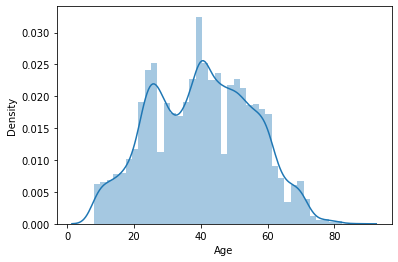

In [22]:
# BT
qtt_features_age = (df[['Age']])
#plt.hist(qtt_features_age, bins=10)
#plt.hist(qtt_features_age, bins=100)

sns.distplot(df['Age'])


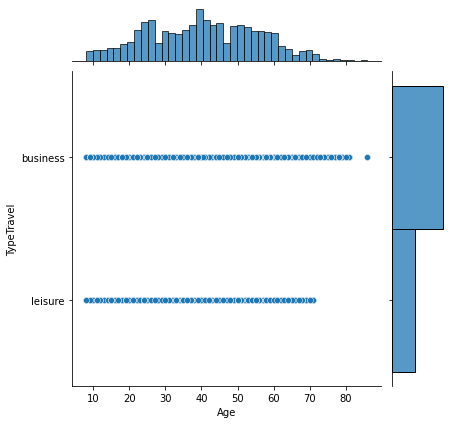

In [23]:
# BT
sns.jointplot(x='Age',y='TypeTravel',data=df)

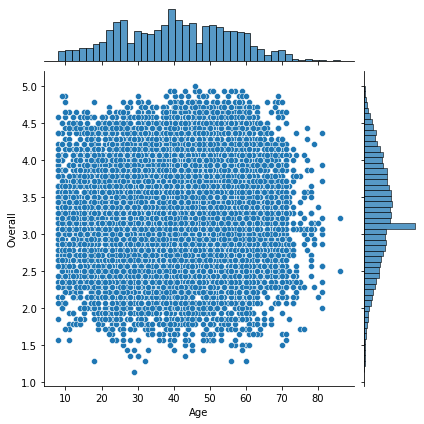

In [24]:
# BT
sns.jointplot(x='Age',y='Overall',data=df)

In [25]:
print(df.groupby(['Overall']).size())

Overall
1.142857      1
1.285714      4
1.357143      4
1.428571      7
1.500000     12
1.571429     24
1.642857     29
1.714286     41
1.785714     66
1.857143     81
1.928571     79
2.000000    105
2.071429    149
2.142857    175
2.214286    209
2.285714    257
2.357143    280
2.428571    348
2.500000    340
2.571429    353
2.642857    388
2.714286    428
2.785714    475
2.857143    509
2.928571    487
3.000000    511
3.071429    567
3.142857    610
3.214286    597
3.285714    626
3.357143    601
3.428571    637
3.500000    615
3.571429    619
3.642857    581
3.714286    530
3.785714    526
3.857143    518
3.928571    433
4.000000    401
4.071429    427
4.142857    367
4.214286    288
4.285714    239
4.357143    267
4.428571    207
4.500000    171
4.571429    130
4.642857     92
4.714286     69
4.785714     38
4.857143     20
4.928571     11
5.000000      1
dtype: int64


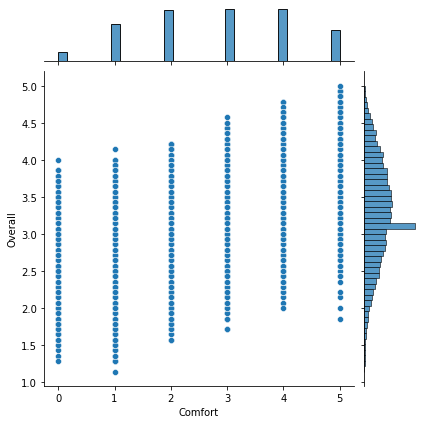

In [26]:
# BT
sns.jointplot(x='Comfort',y='Overall',data=df)

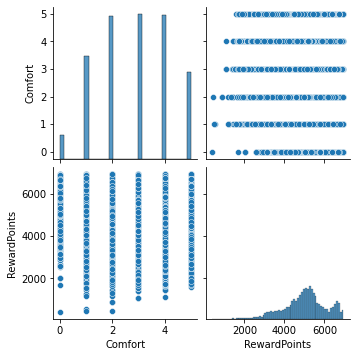

In [27]:
# BT
df_qtt = df[["Comfort","RewardPoints"]]
sns.pairplot(df_qtt)

In [28]:
# BT
px.histogram(df['Comfort'],width=500, height=500)

In [29]:
# BT
px.histogram(data_frame=df,x = 'Age',facet_col = 'Longevity',width=1000, height=500)

In [30]:
# BT
px.histogram(data_frame=df,x = 'RewardPoints',facet_col = 'Longevity',width=1000, height=500)

In [31]:
# BT
px.histogram(data_frame=df,x = 'Age',facet_col = 'Churn',width=1000, height=500)

In [32]:
# BT
px.histogram(data_frame=df,x = 'RewardPoints',facet_col = 'Churn',width=1000, height=500)

array([[<AxesSubplot:title={'center':'Comfort'}>,
        <AxesSubplot:title={'center':'ReceptionSchedule'}>,
        <AxesSubplot:title={'center':'FoodDrink'}>,
        <AxesSubplot:title={'center':'Location'}>],
       [<AxesSubplot:title={'center':'Wifi'}>,
        <AxesSubplot:title={'center':'Amenities'}>,
        <AxesSubplot:title={'center':'Staff'}>,
        <AxesSubplot:title={'center':'OnlineBooking'}>],
       [<AxesSubplot:title={'center':'PriceQuality'}>,
        <AxesSubplot:title={'center':'RoomSpace'}>,
        <AxesSubplot:title={'center':'CheckOut'}>,
        <AxesSubplot:title={'center':'Checkin'}>],
       [<AxesSubplot:title={'center':'Cleanliness'}>,
        <AxesSubplot:title={'center':'BarService'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

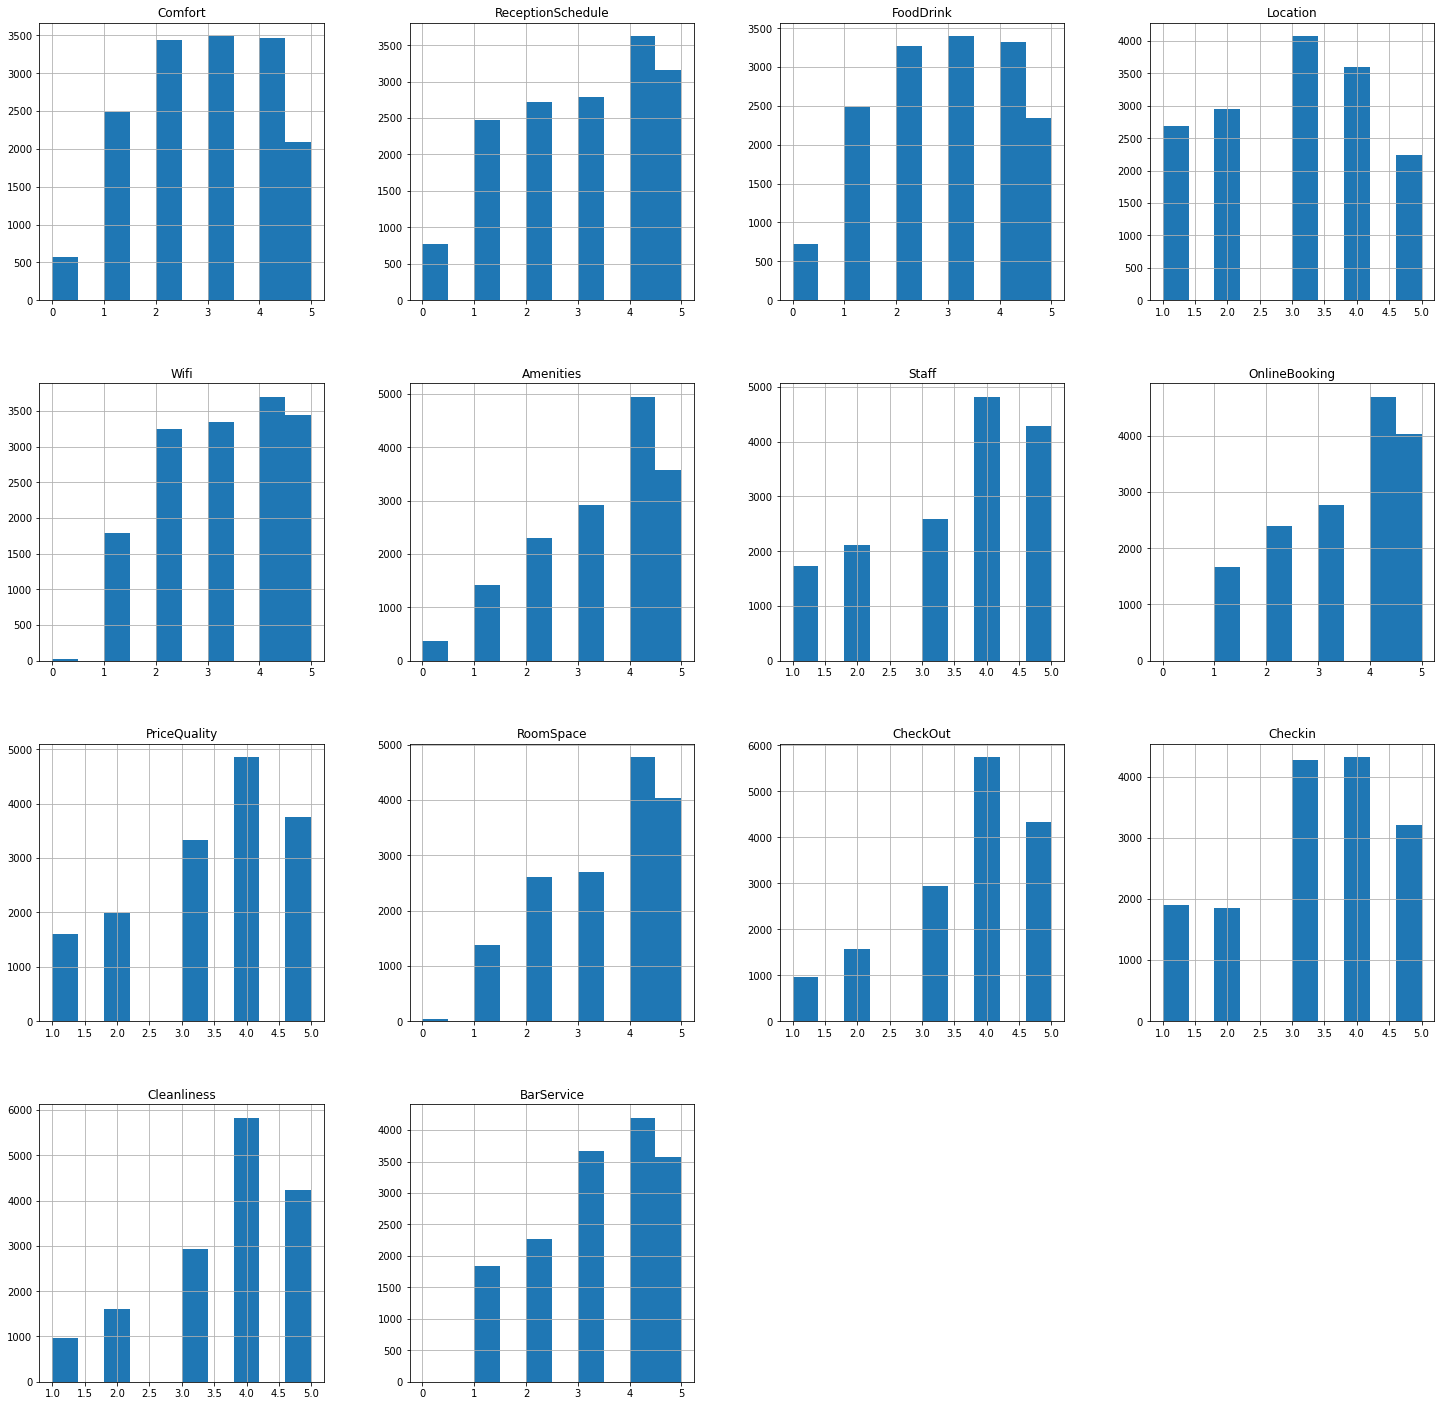

In [33]:
#BT
df_evaluation = df[["Comfort","ReceptionSchedule","FoodDrink","Location","Wifi","Amenities","Staff","OnlineBooking","PriceQuality","RoomSpace","CheckOut","Checkin","Cleanliness","BarService"]]
df_evaluation.hist(figsize=(25, 25))

In [34]:
# BT
px.histogram(df['Age'],color=df['TypeTravel'],width=500, height=500)


In [35]:
# BT
px.histogram(df['Age'],color=df['Longevity'],width=500, height=500)

In [36]:
# BT
px.histogram(df['Age'],color=df['Gender'],width=500, height=500)

In [37]:
# BT
px.histogram(df['Age'],color=df['Churn'],width=500, height=500)

In [38]:
# BT
px.histogram(df['RewardPoints'],color=df['TypeTravel'],width=500, height=500)

In [39]:
# BT
px.histogram(df['RewardPoints'],color=df['Longevity'],width=500, height=500)

In [40]:
# BT
px.histogram(df['RewardPoints'],color=df['Gender'],width=500, height=500)

In [41]:
# BT
px.histogram(df['RewardPoints'],color=df['Churn'],width=500, height=500)

In [42]:
# BT
fig=make_subplots(rows=1,cols=1)
fig.append_trace(go.Histogram(x=qtt_features_age["Age"],name="Age"),1,1)
fig.update_layout(title_text="Histograms of RewardPoints, Overall & Age",width=500)
#fig.show(renderer="jpeg")
fig.show()

In [43]:
# BT
len(df_nome_idade.index)

117


Mesmo nome, mesma idade e mesmos RewardPoints, teste para verificar se é a mesma pessoa

In [44]:
# BT
df_nome_idade_rp=df[df.duplicated(subset=['Name','Age','RewardPoints'], keep=False)]
df_nome_idade_rp.sort_values("Name").head()

Empty DataFrame
Columns: [Churn, Name, Longevity, Age, TypeTravel, RoomType, RewardPoints, Comfort, ReceptionSchedule, FoodDrink, Location, Wifi, Amenities, Staff, OnlineBooking, PriceQuality, RoomSpace, CheckOut, Checkin, Cleanliness, BarService, Overall, Gender]
Index: []

[0 rows x 23 columns]


Sendo clientes com diferentes RewardPoints podemos considerar que o mesmo nome e idade não são suficientes para justificar serem a mesma pessoa
Caso existissem as datas de reserva poderia ser possivel ver se existia sobreposição de datas e assim concluir sobre serem pessoa diferentes com o mesmo nome e idade.

### 2ª Exploração para insights
Considerando agora o dataset já tratado

As diferenças mais significativas das médias gerais das avaliações encontram-se nos grupos:
1. Churn vs No-Churn
2. Longevity: Yes vs No

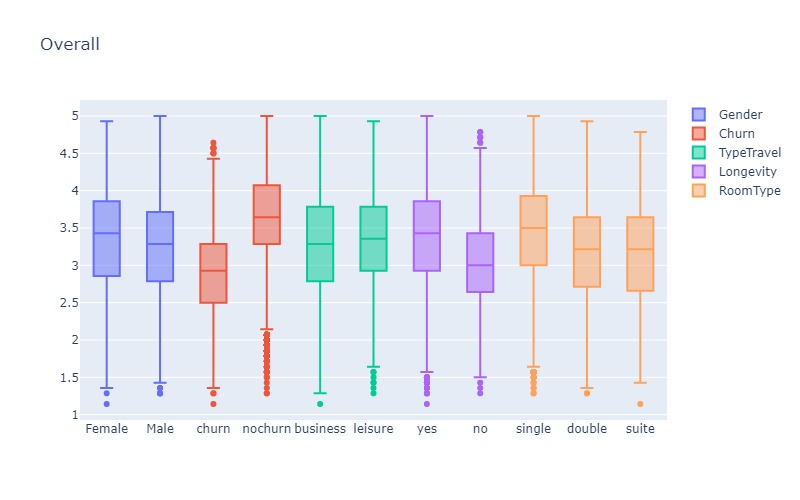

In [45]:
feat="Overall"
fig = go.Figure()
fig.add_trace(go.Box(x=df["Gender"],y=df[feat],name="Gender"))
fig.add_trace(go.Box(x=df["Churn"],y=df[feat],name="Churn"))
fig.add_trace(go.Box(x=df["TypeTravel"],y=df[feat],name="TypeTravel"))
fig.add_trace(go.Box(x=df["Longevity"],y=df[feat],name="Longevity"))
fig.add_trace(go.Box(x=df["RoomType"],y=df[feat],name="RoomType"))
fig.update_layout(title_text=feat,width=800)
fig.show(renderer="jpeg")


Como vamos tratar os outliers, pontos <1Q ou >4Q ?
Como é que é o balanceamento destas variáveis? NoChurn tem muitos outliers, como se distribui a feature no data set?

In [46]:
# BT
print(df.groupby(['Churn']).size())
print(df.groupby(['Gender']).size())
print(df.groupby(['TypeTravel']).size())
print(df.groupby(['Longevity']).size())
print(df.groupby(['RoomType']).size())


Churn
churn      7095
nochurn    8455
dtype: int64
Gender
Female    7966
Male      7584
dtype: int64
TypeTravel
business    10730
leisure      4820
dtype: int64
Longevity
no      2868
yes    12682
dtype: int64
RoomType
double    7002
single    7429
suite     1119
dtype: int64



A distribuição está balanceada nas variáveis
    churn/nochurn
    Gender
    RoomType (a discutir como tratar a suite)
A distribuição não está balanceada nas variáveis
    TypeTravel
    Longevity


Das análises abaixo, verifica-se que os prováveis maiores motivos de deixar de utilizar o serviço com potencial para melhora são:
1. Amenities
2. OnlineBooking
3. Staff

1. Analisando as médias das features para churn e nochurn

In [47]:
df_churn_feats=pd.concat([df["Churn"],df.iloc[:,7:22]],axis=1)
df_mean_churn=df_churn_feats.groupby("Churn").mean()
df_mean_churn=pd.concat([df_mean_churn.T,df_mean_churn.T["nochurn"]-df_mean_churn.T["churn"]],axis=1)
df_mean_churn=df_mean_churn.rename(columns={0:"delta"}).sort_values("delta",ascending=False)
df_mean_churn.style.apply(lambda x: ['background: green' 
                                  if (x.name == 'Overall')
                                  else '' for i in x], axis=1)

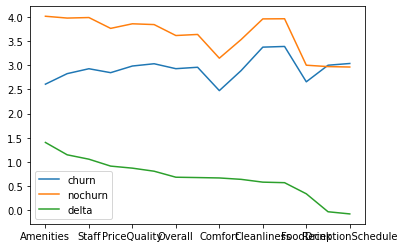

In [48]:
# BT
# Porquê indicar que os primeiros 3 são os importantes, qual o critério para indicar 3 e não 5, por exemplo?
# É aceitavél como critério todas as features em que o delta é maior que a diferença entre as medianas dos conjuntos churn/nochurn?
lines = df_mean_churn.plot.line()

Buscando entender as diferenças de percepção dos clientes de longa data contra os clientes novos, verifica-se novamente que as seguintes features se destacam:
1. Amenities
3. Staff
4. OnlineBooking

2. A mesma análise de médias para Longevidade

In [49]:
df_longevity_feats=pd.concat([df["Longevity"],df.iloc[:,7:22]],axis=1)
df_mean_longevity=df_longevity_feats.groupby("Longevity").mean()
df_mean_longevity=pd.concat([df_mean_longevity.T,df_mean_longevity.T["yes"]-df_mean_longevity.T["no"]],axis=1)
df_mean_longevity=df_mean_longevity.rename(columns={0:"delta"}).sort_values("delta",ascending=False)
df_mean_longevity.style.apply(lambda x: ['background: green' 
                                  if (x.name == 'Overall')
                                  else '' for i in x], axis=1)


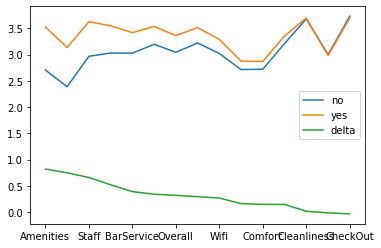

In [50]:
# BT
lines = df_mean_longevity.plot.line()

Desta duas análises, concluí-se que a primeira percepção dos clientes sob estas features são em média ruins face aos clientes de longo prazo, podendo ser uma sugestão de marketing focar em promoções e melhorias nas mesmas. Estas também são as principais causas de abandono da utilização do serviço.


Notar que o dataset está desbalanceado na variável longevity, Yes = 12523 e No = 2832.
Podemos assumir que i) os clientes com maior fidelidade preenchem mais vezes o inquérito de satisfação ou ii) assumir que na generalidade todos os clientes preenchem o inquérito de satisfação e que os clientes frequentes mantêm regularidade nas reservas enquanto os clientes novos entram, não gostam, avaliam pior e não regressam.

Não é possível tirar conclusões relevantes da distribuição das notas agrupando pelos RewardPoints.

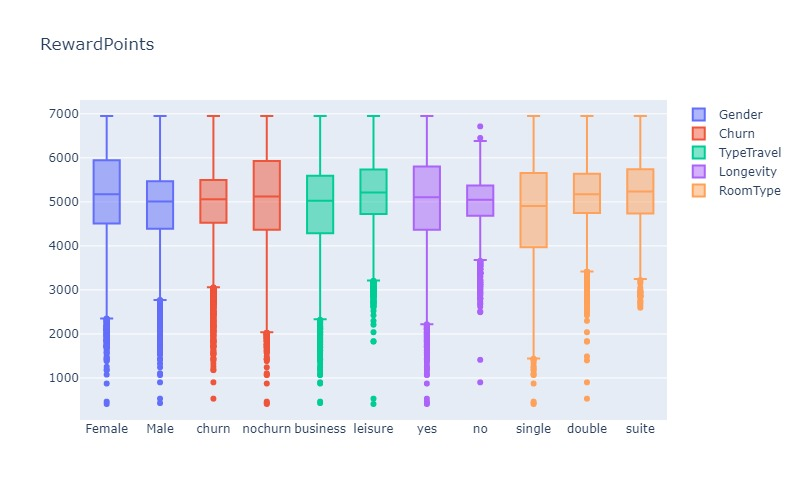

In [51]:
feat="RewardPoints"
fig = go.Figure()
fig.add_trace(go.Box(x=df["Gender"],y=df[feat],name="Gender"))
fig.add_trace(go.Box(x=df["Churn"],y=df[feat],name="Churn"))
fig.add_trace(go.Box(x=df["TypeTravel"],y=df[feat],name="TypeTravel"))
fig.add_trace(go.Box(x=df["Longevity"],y=df[feat],name="Longevity"))
fig.add_trace(go.Box(x=df["RoomType"],y=df[feat],name="RoomType"))
fig.update_layout(title_text=feat,width=800)
fig.show(renderer="jpeg")


O que podemos concluir com a forte presença de outliers nestas distribuições?
O que concluimos com os clientes longevity=no terem uma mediana muito próxima dos clientes longevity=yes? Isto não significa que o sistema de Reward Points está a funcionar mal?

Analisando se existe alguma correlação elevada entre as features que ajude a perceber um possível setor mais forte na empresa em relação à outro (por exemplo IT vs serviço geral do hotel).

As correlações mais elevadas são:
1. 0,7 Overall com OnlineBooking
    - Um bom indicador que o onlinebooking está bem relacionado com a satisfação geral do cliente.
2. 0,66, 0,65 e 0,62 BarService com OnlineBooking, Staff e Wifi respectivamente.
    - Nenhum insight direto uma vez que BarService não deveria ter uma correlação direta com OnlineBooking, Staff e Wifi.
3. Checkout e limpeza possuem elevada correlação 0,63 o que pode indicar que o momento final do cliente nas instalações ele leva na memória a limpeza como algo importante.
4. As seguintes já passam a ser abaixo de 0,5 e não serão consideradas.

Como a maioria não está muito correlacionada, não há a necessidade de eliminar features antes do clustering.

<AxesSubplot:>

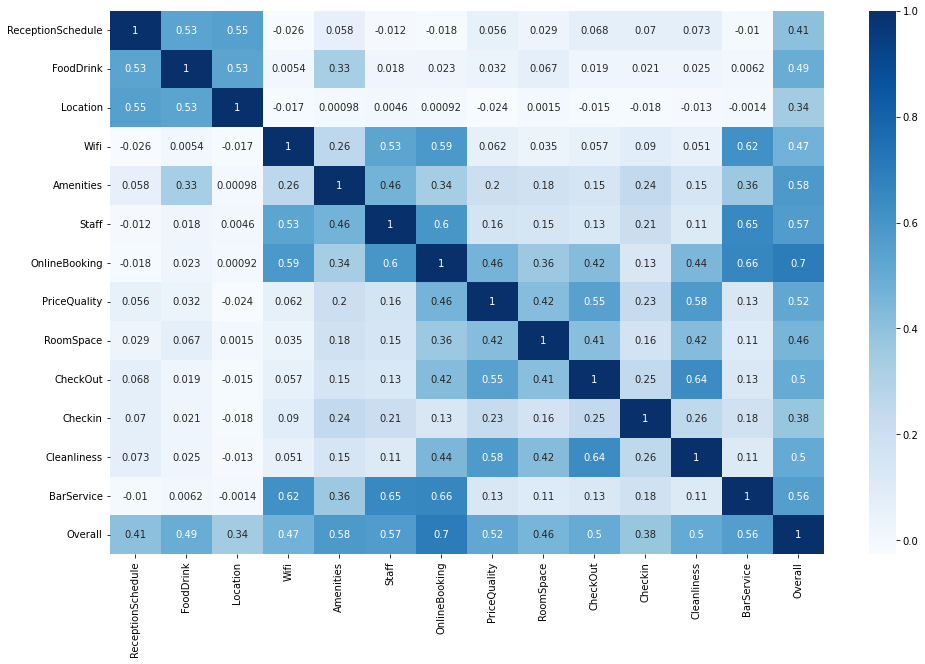

In [52]:
df_feats_only = df.iloc[:,8:22]
df_corr = df_feats_only.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, cmap="Blues")

In [53]:
names=df["Name"].unique()

Pelos histogramas a seguir, percebe-se que:
1. Nos Rewards a distribuição há grandes saltos em 3k, 4.5k e novamente em 6k.
2. Na avaliação Overall não há grandes insights a serem tirados, sendo mais apropriado observar os boxplots.
3. Na idade observamos que a maior parte da população se encontra a partir dos 21 ao 61 anos, podendo ignorar os clientes acima de 71 anos ou incentivar a utilização do serviço por eles.

In [54]:
fig=make_subplots(rows=1,cols=3)
fig.append_trace(go.Histogram(x=df["RewardPoints"],name="RewardPoints"),1,1)
fig.append_trace(go.Histogram(x=df["Overall"],name="Overall"),1,2)
fig.append_trace(go.Histogram(x=df["Age"],name="Age"),1,3)
fig.update_layout(title_text="Histograms of RewardPoints, Overall & Age",width=1000)
#fig.show(renderer="jpeg")
fig.show()

### KModes Clustering Algorithm 

Daqui para baixo precisamos discutir quais features utilizar para gerar os clusters de segregação.

Serão testados KModes para as categóricas e KMeans para as avaliações:

In [55]:
df_cluster=df[["Churn","Longevity","TypeTravel","Overall"]]
df_cluster.head()

Churn Longevity TypeTravel   Overall
0    churn       yes   business  3.285714
1  nochurn       yes   business  3.142857
2    churn       yes   business  2.714286
3  nochurn       yes    leisure  3.142857
4  nochurn       yes   business  3.571429

Método do cotovelo para buscar o número de clusters ótimo.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 29696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 29696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 29696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 29696.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2217, cost: 24299.0
Run 1, iteration: 2/100, moves: 0, cost: 24299.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 29170.0
Init: initializing cent

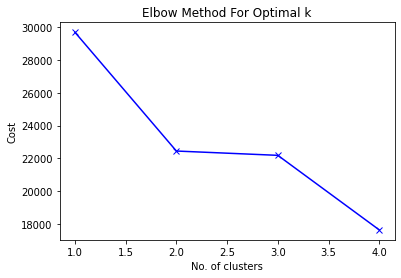

In [56]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = km.KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cluster)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [57]:
kmode = km.KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cluster)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 395, cost: 23779.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6768, cost: 19819.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 202, cost: 22038.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4328, cost: 19841.0
Run 4, iteration: 2/100, moves: 0, cost: 19841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6749, cost: 22146.0
Run 5, iteration: 2/100, moves: 0, cost: 22146.0
Best run was number 2


array([2, 0, 2, ..., 0, 0, 2], dtype=uint16)

Observa-se que os 3 clusters criados tem as seguintes características:
0. Churn e Business
1. Leisure
2. NoChurn e Business

Longevidade aparentemente não tem nenhum impacto.

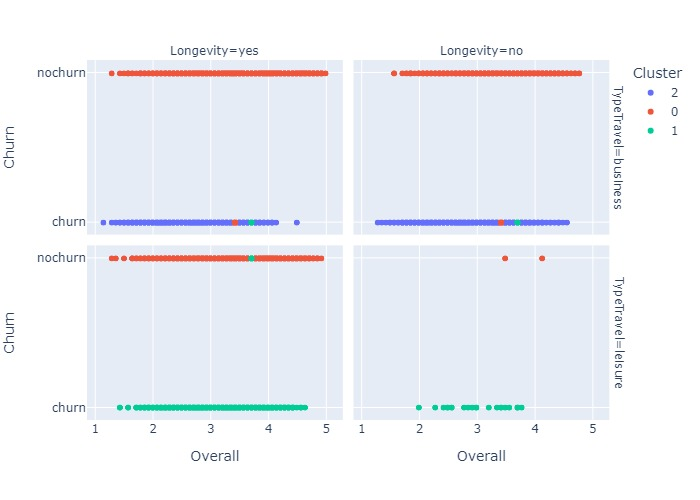

In [58]:
df_cluster.insert(0, "Cluster", clusters, True)
fig=px.scatter(df_cluster,y="Churn",x="Overall",color="Cluster",facet_col="Longevity",facet_row="TypeTravel")
fig.show(renderer="jpeg")

### KMeans


Scaling Reward Points and Age

In [60]:
df= df.reset_index(drop=True)
scaler = MinMaxScaler(feature_range=(0,5))
df["Age"] = pd.DataFrame(scaler.fit_transform(df[["Age"]]))
df["RewardPoints"] = pd.DataFrame(scaler.fit_transform(df[["RewardPoints"]]))
df.tail()

Churn                Name Longevity       Age TypeTravel RoomType  \
15545    churn   Ms. Wendy Roberts        no  1.666667   business   double   
15546    churn     Ms. Sonya Smith        no  0.897436   business   double   
15547  nochurn  Mr. Maxwell Wright       yes  3.205128   business   single   
15548  nochurn   Mr. Gregory Moran       yes  1.410256    leisure   double   
15549    churn   Mr. Steven Mendez       yes  1.987179   business    suite   

       RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  Staff  \
15545      3.484941        2                  0          2  ...      4   
15546      3.486470        3                  3          3  ...      5   
15547      2.780156        1                  1          1  ...      5   
15548      3.627886        4                  3          4  ...      5   
15549      3.613362        3                  3          3  ...      3   

       OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
15545              3             4          5         1        3            4   
15546              5             3          1         3        4            4   
15547              4             4          4         4        5            4   
15548              5             2          5         4        3            4   
15549              3             4          5         4        1            3   

       BarService   Overall  Gender  
15545           3  2.714286  Female  
15546           5  3.571429  Female  
15547           4  3.214286    Male  
15548           5  4.071429    Male  
15549           3  3.142857    Male  

[5 rows x 23 columns]

O mesmo mas agora apenas paras avaliações dos clientes.

In [61]:
df_kmeans=df.iloc[:,7:21]
df_kmeans.head()

Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  Amenities  Staff  \
0        3                  4          1         4     4          3      4   
1        1                  1          1         1     5          3      4   
2        3                  3          3         3     1          4      4   
3        1                  1          1         1     4          4      5   
4        2                  2          3         2     5          5      5   

   OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
0              3             3          3         3        4            3   
1              5             5          5         5        1            5   
2              3             3          2         3        2            3   
3              4             4          4         4        4            4   
4              5             5          3         4        1            3   

   BarService  
0           4  
1           2  
2           1  
3           3  
4           5

In [62]:
kmeans= KMeans(3)
kmeans.fit(df_kmeans)

KMeans(n_clusters=3)

In [63]:
kmeans_clusters = kmeans.fit_predict(df_kmeans)
kmeans_clusters

array([0, 0, 2, ..., 0, 1, 2])

In [64]:
df_kmeans_categorical=df
df_kmeans_categorical.insert(0, "Cluster", kmeans_clusters, True)

In [65]:
df_kmeans_categorical.groupby("Cluster").size()

Cluster
0    4678
1    5737
2    5135
dtype: int64

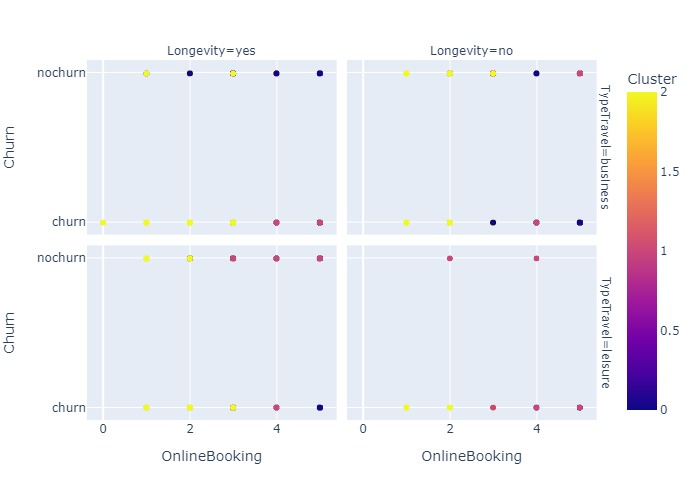

In [66]:
fig=px.scatter(df_kmeans_categorical,y="Churn",x="OnlineBooking",color="Cluster",facet_col="Longevity",facet_row="TypeTravel")
fig.show(renderer="jpeg")

In [3]:
# BT 15Abr22h
df['Meam_Features_Staff'] = df[['ReceptionSchedule','Staff','CheckOut','Checkin']].mean(axis=1)
df['Meam_Features_Amenities'] = df[['FoodDrink','OnlineBooking','BarService','Wifi','Amenities']].mean(axis=1)
df['Meam_Features_Quality'] = df[['Comfort', 'Location','PriceQuality','RoomSpace','Cleanliness']].mean(axis=1)
df.sort_values("Name").head()

Churn                 Name Longevity  Year_Birth TypeTravel RoomType  \
4987   nochurn   Mr. Aaron Anderson       yes      2000.0   business   single   
1607     churn  Mr. Aaron Armstrong       yes      1969.0   business    suite   
3841     churn       Mr. Aaron Barr       yes      1973.0   business   single   
6808   nochurn    Mr. Aaron Bennett       yes      1965.0   business   single   
13991  nochurn      Mr. Aaron Brown       yes      1975.0   business   single   

       RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  \
4987           4628        2                  2          2  ...   
1607           5404        2                  3          3  ...   
3841           5296        1                  5          5  ...   
6808           3851        4                  4          3  ...   
13991          6589        4                  4          4  ...   

       OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  Cleanliness  \
4987               5             3          1         5        2            4   
1607               2             3          3         4        1            4   
3841               1             1          1         1        1            1   
6808               5             5          4         5        4            5   
13991              5             5          5         5        4            5   

       BarService  Meam_Features_Staff  Meam_Features_Amenities  \
4987            5                 3.50                      4.4   
1607            2                 2.50                      2.2   
3841            2                 2.50                      3.0   
6808            3                 4.25                      3.8   
13991           4                 4.50                      3.4   

       Meam_Features_Quality  
4987                     2.4  
1607                     3.0  
3841                     1.8  
6808                     4.4  
13991                    4.6  

[5 rows x 24 columns]